<a href="https://colab.research.google.com/github/Tikam02/CrowdEstimation/blob/master/experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

Setting up libkmod2:amd64 (24-1ubuntu2) ...
Setting up gir1.2-glib-2.0:amd64 (1.54.1-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Setting up unattended-upgrades (0.98ubuntu1.1) ...

Creating config file /etc/apt/apt.conf.d/20auto-upgrades with new version

Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8.1) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24

In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

KeyboardInterrupt: ignored

In [0]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
# Work around misordering of STREAM and STDIN in Jupyter.
# https://github.com/jupyter/notebook/issues/3159
prompt = !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass(prompt[0] + '\n\nEnter verification code: ')
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force

Enter verification code: ··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

print ('Files in Drive:')
!ls drive/

# Create a file in Drive.
!echo ("This newly created file will appear in your Drive file list.") > drive/created.txt

Files in Drive:
201601030-Sc-107		      owtf
Colab Notebooks			      owtf (26c047d1)
created.txt			      Pics 
Custom_test_B.odt		      random
docs				      shanghaib.caffemodel
eYBaa1kGrjMNhPPhSsbvtRSLiWu1.odt      SmsContactsBackup
eYBaa1kGrjMNhPPhSsbvtRSLiWu1.pdf.odt  tickets?
Hacking books			      tikamalma_resume.pdf
Hal				      TIKAM daiictALMA.odt
Memories			      Untitled document.odt
ml				      Untitled document.odt (720217d3)
natas				      Videos 
Nettacker
/bin/sh: 1: Syntax error: word unexpected (expecting ")")


In [0]:
ls

datalab/  drive/  predict.txt


In [0]:
cd /content/drive/ml

[Errno 2] No such file or directory: '/content/drive/ml'
/content


In [0]:
cd CSRNet-mx

/content/drive/ml/CSRNet-mx


In [0]:
!apt install -y caffe-cuda


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  caffe-tools-cuda cython3 fonts-lyx gdal-data javascript-common libarmadillo7
  libarpack2 libblosc1 libboost-python1.62.0 libboost-system1.62.0
  libboost-thread1.62.0 libcaffe-cuda1 libdap25 libdapclient6v5 libepsilon1
  libfreexl1 libfyba0 libgdal20 libgeos-3.5.1 libgeos-c1v5 libgeotiff2
  libgflags2.2 libgif7 libgoogle-glog0v5 libhdf4-0-alt libilmbase12 libjbig0
  libjs-jquery libjs-jquery-ui libjson-c3 libkmlbase1 libkmldom1 libkmlengine1
  liblcms2-2 libleveldb1v5 liblmdb0 libltdl7 liblzo2-2 libminizip1
  libmysqlclient20 libnetcdf11 libnspr4 libnss3 libodbc1 libogdi3.2
  libopencv-core3.1 libopencv-imgcodecs3.1 libopencv-imgproc3.1 libopenexr22
  libopenjp2-7 libpoppler68 libpq5 libproj12 libprotobuf10 libqhull7
  libsnappy1v5 libspatialite7 libsuperlu5 libtbb2 libtiff5 liburiparser1
  libwebp6 libwebpmux3 libxerces-c3.1 libxslt1.1

Get:70 http://archive.ubuntu.com/ubuntu artful/universe amd64 python3-h5py amd64 2.7.1-2 [631 kB]
Get:71 http://archive.ubuntu.com/ubuntu artful/universe amd64 python3-decorator all 4.1.1-1 [9,264 B]
Get:72 http://archive.ubuntu.com/ubuntu artful/main amd64 python3-ptyprocess all 0.5.2-1 [12.7 kB]
Get:73 http://archive.ubuntu.com/ubuntu artful/main amd64 python3-pexpect all 4.2.1-1 [42.4 kB]
Get:74 http://archive.ubuntu.com/ubuntu artful/universe amd64 python3-pickleshare all 0.7.4-2 [6,904 B]
Get:75 http://archive.ubuntu.com/ubuntu artful/main amd64 python3-pkg-resources all 36.2.7-2 [98.7 kB]
Get:76 http://archive.ubuntu.com/ubuntu artful/universe amd64 python3-wcwidth all 0.1.7+dfsg1-1 [14.7 kB]
Get:77 http://archive.ubuntu.com/ubuntu artful/universe amd64 python3-prompt-toolkit all 1.0.14-1 [163 kB]
Get:78 http://archive.ubuntu.com/ubuntu artful/main amd64 python3-pygments all 2.2.0+dfsg-1 [574 kB]
Get:79 http://archive.ubuntu.com/ubuntu artful/universe amd64 python3-simplegeneric 

Extracting templates from packages: 100%

78Selecting previously unselected package liblzo2-2:amd64.
(Reading database ... 19833 files and directories currently installed.)
Preparing to unpack .../000-liblzo2-2_2.08-1.2_amd64.deb ...
7Progress: [  0%] [..........................................................] 8Unpacking liblzo2-2:amd64 (2.08-1.2) ...
Selecting previously unselected package poppler-data.
Preparing to unpack .../001-poppler-data_0.4.8-1_all.deb ...
Unpacking poppler-data (0.4.8-1) ...
Selecting previously unselected package libjbig0:amd64.
Preparing to unpack .../002-libjbig0_2.1-3.1_amd64.deb ...
7Progress: [  1%] [..........................................................] 8Unpacking libjbig0:amd64 (2.1-3.1) ...
Selecting previously unselected package libjson-c3:amd64.
Preparing to unpack .../003-libjson-c3_0.12.1-1.2_amd64.deb ...
Unpacking libjson-c3:amd64 (0.12.1-1.2) ...
Selecting previously unselected package libyaml-0-2:amd64.
Preparing to unpack .../004-

Selecting previously unselected package libfreexl1:amd64.
Preparing to unpack .../024-libfreexl1_1.0.3-1_amd64.deb ...
Unpacking libfreexl1:amd64 (1.0.3-1) ...
7Progress: [ 12%] [#######...................................................] 8Selecting previously unselected package libfyba0:amd64.
Preparing to unpack .../025-libfyba0_4.1.1-3_amd64.deb ...
Unpacking libfyba0:amd64 (4.1.1-3) ...
Selecting previously unselected package libgeos-3.5.1.
Preparing to unpack .../026-libgeos-3.5.1_3.5.1-3_amd64.deb ...
Unpacking libgeos-3.5.1 (3.5.1-3) ...
7Progress: [ 13%] [#######...................................................] 8Selecting previously unselected package libgeos-c1v5.
Preparing to unpack .../027-libgeos-c1v5_3.5.1-3_amd64.deb ...
Unpacking libgeos-c1v5 (3.5.1-3) ...
Selecting previously unselected package proj-data.
Preparing to unpack .../028-proj-data_4.9.3-2_all.deb ...
Unpacking proj-data (4.9.3-2) ...
7Progress: [ 14%] [########........................................

Selecting previously unselected package libnss3:amd64.
Preparing to unpack .../048-libnss3_2%3a3.32-1ubuntu3_amd64.deb ...
Unpacking libnss3:amd64 (2:3.32-1ubuntu3) ...
7Progress: [ 24%] [#############.............................................] 8Selecting previously unselected package libpoppler68:amd64.
Preparing to unpack .../049-libpoppler68_0.57.0-2ubuntu4.3_amd64.deb ...
Unpacking libpoppler68:amd64 (0.57.0-2ubuntu4.3) ...
Selecting previously unselected package libpq5:amd64.
Preparing to unpack .../050-libpq5_9.6.9-0ubuntu0.17.10_amd64.deb ...
Unpacking libpq5:amd64 (9.6.9-0ubuntu0.17.10) ...
7Progress: [ 25%] [##############............................................] 8Selecting previously unselected package libqhull7:amd64.
Preparing to unpack .../051-libqhull7_2015.2-2_amd64.deb ...
Unpacking libqhull7:amd64 (2015.2-2) ...
Selecting previously unselected package libspatialite7:amd64.
Preparing to unpack .../052-libspatialite7_4.3.0a-5build1_amd64.deb ...
Unpacking libs

Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../074-python3-pkg-resources_36.2.7-2_all.deb ...
Unpacking python3-pkg-resources (36.2.7-2) ...
Selecting previously unselected package python3-wcwidth.
Preparing to unpack .../075-python3-wcwidth_0.1.7+dfsg1-1_all.deb ...
Unpacking python3-wcwidth (0.1.7+dfsg1-1) ...
7Progress: [ 37%] [#####################.....................................] 8Selecting previously unselected package python3-prompt-toolkit.
Preparing to unpack .../076-python3-prompt-toolkit_1.0.14-1_all.deb ...
Unpacking python3-prompt-toolkit (1.0.14-1) ...
Selecting previously unselected package python3-pygments.
Preparing to unpack .../077-python3-pygments_2.2.0+dfsg-1_all.deb ...
Unpacking python3-pygments (2.2.0+dfsg-1) ...
7Progress: [ 38%] [######################....................................] 8Selecting previously unselected package python3-simplegeneric.
Preparing to unpack .../078-python3-simplegeneric_0.8.1-1_all

7Progress: [ 48%] [###########################...............................] 8Selecting previously unselected package python3-olefile.
Preparing to unpack .../098-python3-olefile_0.44-1_all.deb ...
Unpacking python3-olefile (0.44-1) ...
Selecting previously unselected package libwebpmux3:amd64.
Preparing to unpack .../099-libwebpmux3_0.6.0-3_amd64.deb ...
Unpacking libwebpmux3:amd64 (0.6.0-3) ...
7Progress: [ 49%] [############################..............................] 8Selecting previously unselected package python3-pil:amd64.
Preparing to unpack .../100-python3-pil_4.1.1-3build2_amd64.deb ...
Unpacking python3-pil:amd64 (4.1.1-3build2) ...
Selecting previously unselected package python3-protobuf.
Preparing to unpack .../101-python3-protobuf_3.0.0-9ubuntu5_amd64.deb ...
Unpacking python3-protobuf (3.0.0-9ubuntu5) ...
7Progress: [ 50%] [#############################.............................] 8Selecting previously unselected package python3-scipy.
Preparing to unpack ..

Setting up libjs-jquery (3.1.1-2) ...
Setting up libxerces-c3.1:amd64 (3.1.4+debian-2) ...
Setting up python3-pickleshare (0.7.4-2) ...
7Progress: [ 61%] [###################################.......................] 8Setting up libdap25:amd64 (3.19.0-1) ...
Setting up libgflags2.2 (2.2.1-1) ...
Setting up python3-simplegeneric (0.8.1-1) ...
7Progress: [ 62%] [###################################.......................] 8Setting up libnetcdf11 (1:4.4.1.1-2ubuntu1) ...
Setting up python3-webencodings (0.5-2) ...
Setting up libopenjp2-7:amd64 (2.2.0-1) ...
7Progress: [ 63%] [####################################......................] 8Setting up libqhull7:amd64 (2015.2-2) ...
Setting up liblmdb0:amd64 (0.9.21-1) ...
Setting up python3-olefile (0.44-1) ...
7Progress: [ 64%] [#####################################.....................] 8Setting up liblcms2-2:amd64 (2.7-1ubuntu1) ...
Setting up libjbig0:amd64 (2.1-3.1) ...
Setting up poppler-data (0.4.8-1) ...
7Progress: [ 65%] [######

Setting up python3-pywt (0.5.1-1.1ubuntu4) ...
Setting up javascript-common (11) ...
7Progress: [ 80%] [##############################################............] 8Setting up libhdf4-0-alt (4.2.13-1) ...
Setting up python3-decorator (4.1.1-1) ...
Setting up python3-traitlets (4.3.2-1) ...
7Progress: [ 81%] [##############################################............] 8Setting up python3-ptyprocess (0.5.2-1) ...
Setting up python3-tz (2017.2-2) ...
Setting up libboost-system1.62.0:amd64 (1.62.0+dfsg-4build3) ...
7Progress: [ 82%] [###############################################...........] 8Setting up libgeos-3.5.1 (3.5.1-3) ...
Setting up liblzo2-2:amd64 (2.08-1.2) ...
Setting up liburiparser1:amd64 (0.8.4-1) ...
7Progress: [ 83%] [################################################..........] 8Setting up python3-dateutil (2.6.0-1) ...
Setting up python3-h5py (2.7.1-2) ...
Setting up fonts-lyx (2.2.3-1) ...
7Progress: [ 84%] [################################################......


78

In [0]:
import caffe

In [0]:
import caffe
import numpy as np
import cv2

MEAN_COLOR = np.array([92.8207477031, 95.2757037428, 104.877445883]).reshape((1, 3, 1, 1)) # BGR

deploy = '/content/drive/ml/CSRNet-mx/models/deploy.prototxt'
caffe_model = '/content/drive/ml/CSRNet-mx/models/shanghaia.caffemodel'

nn = caffe.Net(deploy, caffe_model, caffe.TEST) 

def predict(imgs):
    nn.blobs["data"].reshape(*(imgs.shape))
    nn.blobs["data"].data[...] = imgs
    nn.forward()
    ps = nn.blobs["estdmap"].data.sum((1,2,3))
    return ps 

if __name__ == '__main__':
    import os
    def is_image_file(fname):
        ext = os.path.splitext(fname)[-1].lower()
        return ext == '.jpg'
    data_path = '/content/drive/ml/CSRNet-mx/data/custom_test_A/'
    image_names = list(filter(is_image_file, os.listdir(os.path.join(data_path, 'images'))))
    image_paths = [os.path.join(data_path, 'images', e) for e in image_names]

    fout = open('predict.txt', 'w')
    num_images = len(image_names)
    for i, fname in enumerate(image_paths):
        img_name = image_names[i]
        im = cv2.imread(fname)
        rows, cols, ts = im.shape
        imgs = im.transpose((2,0,1)).reshape((1, 3, rows, cols)) - MEAN_COLOR
        cv2.imshow('Window',imgs)
        cv2.waitKey(0)
        #ps = predict(imgs)
        #p = ps[0]
        #print ('{}/{}: {} {}'.format(i + 1, num_images, img_name, p))
        #fout.write('{} {}\n'.format(img_name, p))
#i += 1

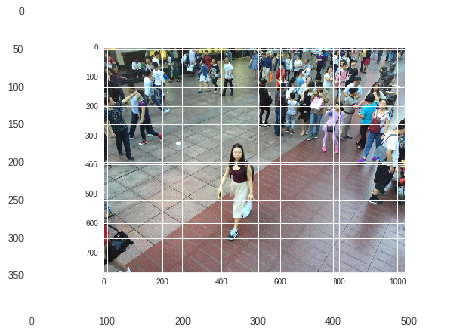

1/7: IMG_297.jpg 55.352352142333984


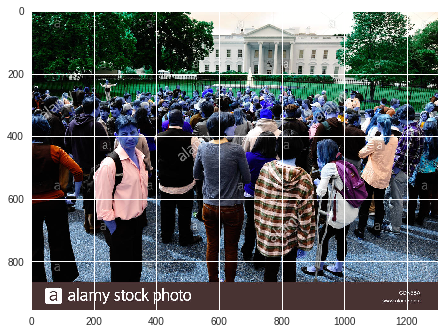

2/7: IMG_2.jpg 160.57569885253906


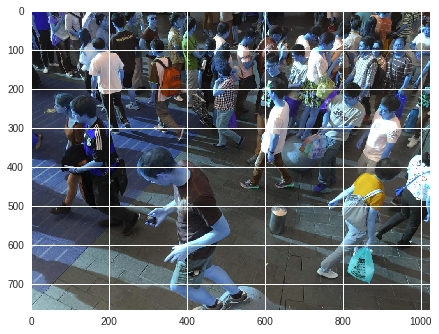

3/7: IMG_9.jpg 46.58504104614258


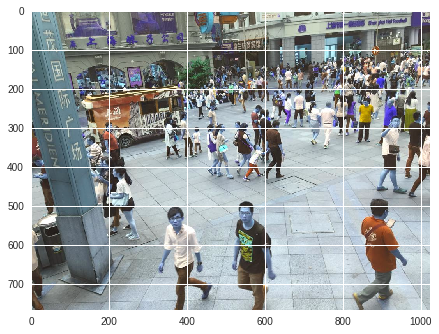

4/7: IMG_18.jpg 256.233154296875


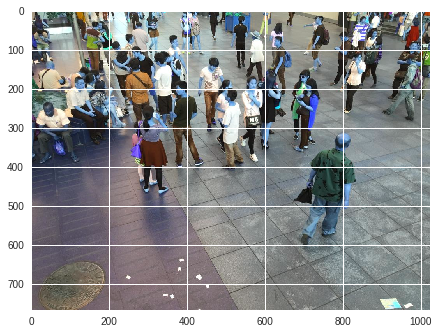

5/7: IMG_126.jpg 50.02176284790039


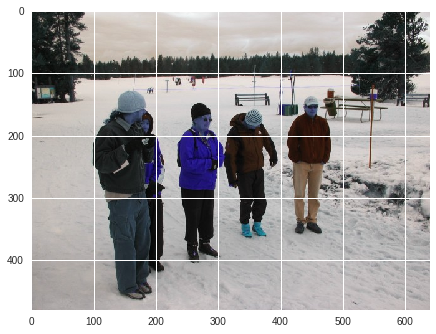

6/7: IMG_4.jpg 12.714275360107422


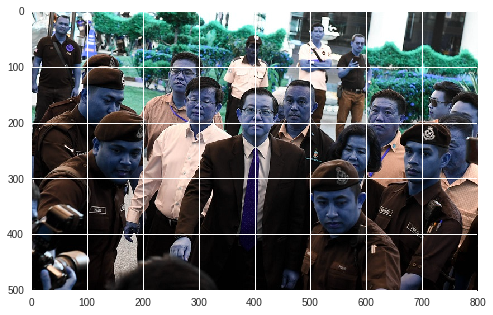

7/7: IMG_1.jpg 36.6650390625


In [0]:
from google.colab import files
import caffe
import numpy as np
import cv2
import os
from pylab import imread,subplot,imshow,show
import matplotlib.pyplot as plt

MEAN_COLOR = np.array([92.8207477031, 95.2757037428, 104.877445883]).reshape((1, 3, 1, 1)) # BGR

deploy = '/content/drive/ml/CSRNet-mx/models/deploy.prototxt'
caffe_model = '/content/drive/ml/CSRNet-mx/models/shanghaib.caffemodel'

nn = caffe.Net(deploy, caffe_model, caffe.TEST) 

def predict(imgs):
    nn.blobs["data"].reshape(*(imgs.shape))
    nn.blobs["data"].data[...] = imgs
    nn.forward()
    ps = nn.blobs["estdmap"].data.sum((1,2,3))
    return ps 

if __name__ == '__main__':
    import os
    def is_image_file(fname):
        ext = os.path.splitext(fname)[-1].lower()
        return ext == '.jpg'
    data_path = '/content/drive/ml/CSRNet-mx/data/custom_test_B/test_data/'
    image_names = list(filter(is_image_file, os.listdir(os.path.join(data_path, 'images'))))
    image_paths = [os.path.join(data_path, 'images', e) for e in image_names]

    fout = open('predict.txt', 'w')
    num_images = len(image_names)
    for i, fname in enumerate(image_paths):
        img_name = image_names[i]
        im = cv2.imread(fname)
        rows, cols, ts = im.shape
        imgs = im.transpose((2,0,1)).reshape((1, 3, rows, cols)) - MEAN_COLOR
        plt.imshow(im)        
        plt.savefig(fname,format='png',bbox_inches=None, pad_inches=0.1,frameon=None)
        plt.show()
        ps = predict(imgs)
        p = ps[0]
        print ('{}/{}: {} {}'.format(i + 1, num_images, img_name, p))
        fout.write('{} {}\n'.format(img_name, p))

        i += 1

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


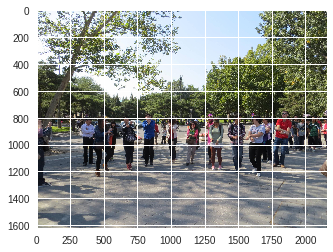

In [0]:
import os
                 
from pylab import imread,subplot,imshow,show

import matplotlib.pyplot as plt

image = imread('/content/drive/ml/CSRNet-mx/data/custom_test_B/test_data/images/IMG_1.jpg') 
plt.imshow(image)

plt.show()

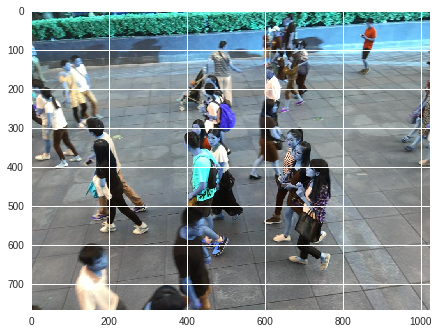

1/18: IMG_14.jpg 30.10563850402832


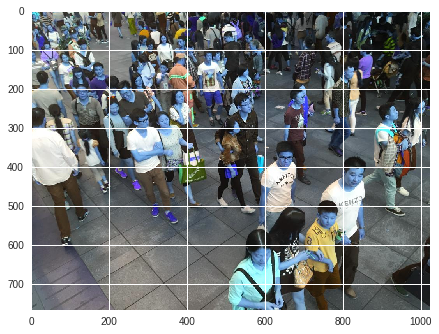

2/18: IMG_4.jpg 88.70083618164062


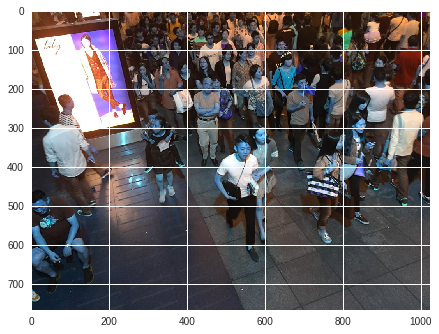

3/18: IMG_5.jpg 68.04550170898438


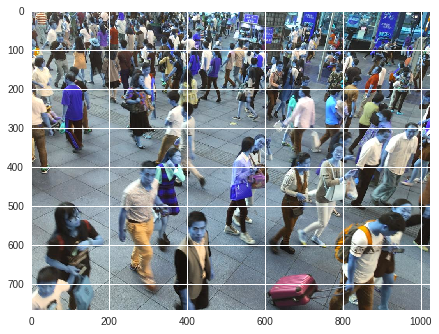

4/18: IMG_10.jpg 171.45326232910156


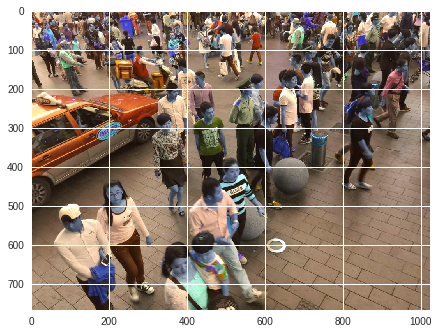

5/18: IMG_16.jpg 103.2696762084961


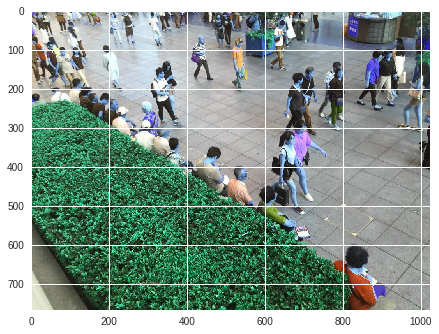

6/18: IMG_13.jpg 42.99266815185547


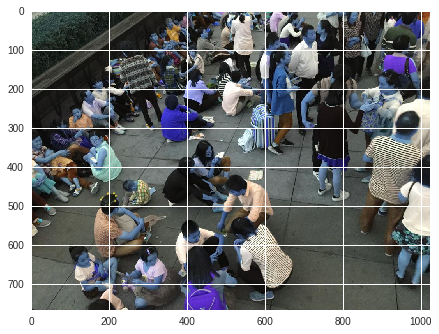

7/18: IMG_2.jpg 59.68329620361328


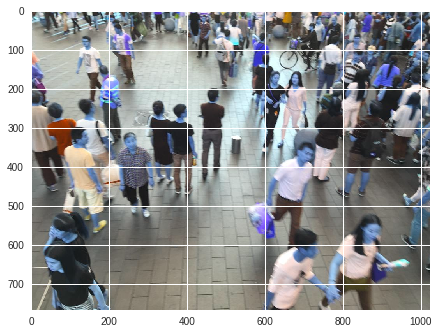

8/18: IMG_3.jpg 60.22513198852539


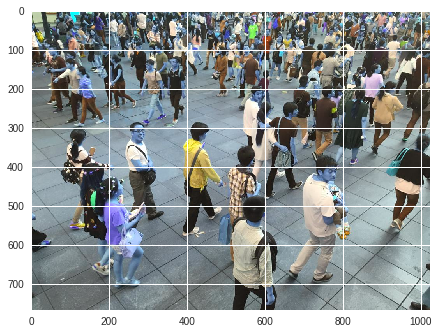

9/18: IMG_11.jpg 171.58067321777344


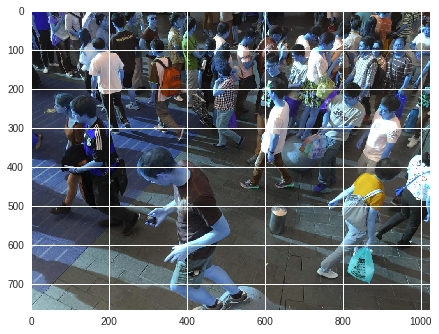

10/18: IMG_9.jpg 46.58504104614258


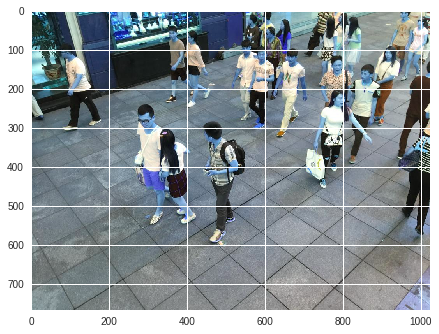

11/18: IMG_1.jpg 26.895307540893555


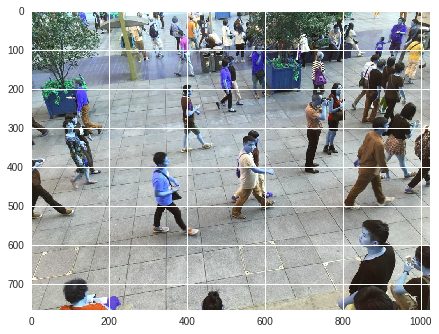

12/18: IMG_7.jpg 48.76469421386719


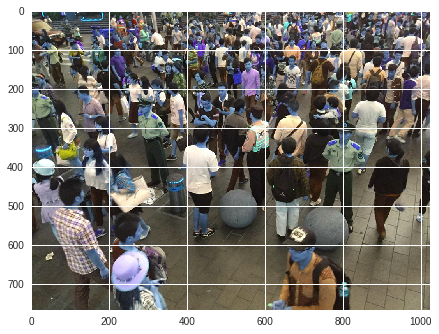

13/18: IMG_6.jpg 228.56375122070312


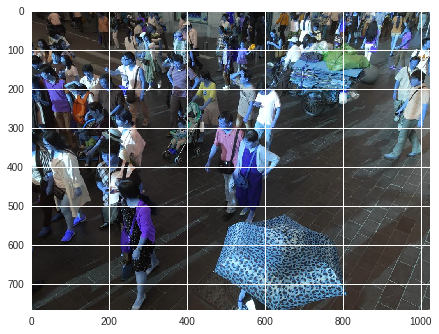

In [0]:
from google.colab import files
import caffe
import numpy as np
import cv2
import os
from pylab import imread,subplot,imshow,show
import matplotlib.pyplot as plt

MEAN_COLOR = np.array([92.8207477031, 95.2757037428, 104.877445883]).reshape((1, 3, 1, 1)) # BGR

deploy = '/content/drive/ml/CSRNet-mx/models/deploy.prototxt'
caffe_model = '/content/drive/ml/CSRNet-mx/models/shanghaib.caffemodel'

nn = caffe.Net(deploy, caffe_model, caffe.TEST) 

def predict(imgs):
    nn.blobs["data"].reshape(*(imgs.shape))
    nn.blobs["data"].data[...] = imgs
    nn.forward()
    ps = nn.blobs["estdmap"].data.sum((1,2,3))
    return ps 

if __name__ == '__main__':
    import os
    def is_image_file(fname):
        ext = os.path.splitext(fname)[-1].lower()
        return ext == '.jpg'
    data_path = '/content/drive/ml/CSRNet-mx/data/shanghaitech/part_B_final/test_data/'
    image_names = list(filter(is_image_file, os.listdir(os.path.join(data_path, 'images'))))
    image_paths = [os.path.join(data_path, 'images', e) for e in image_names]

    fout = open('predict.txt', 'w')
    num_images = len(image_names)
    for i, fname in enumerate(image_paths):
        img_name = image_names[i]
        im = cv2.imread(fname)
        rows, cols, ts = im.shape
        imgs = im.transpose((2,0,1)).reshape((1, 3, rows, cols)) - MEAN_COLOR
        plt.imshow(im)        
        plt.savefig(fname,format='png',bbox_inches=None, pad_inches=0.1,frameon=None)
        plt.show()
        ps = predict(imgs)
        p = ps[0]
        print ('{}/{}: {} {}'.format(i + 1, num_images, img_name, p))
        fout.write('{} {}\n'.format(img_name, p))

        i += 1